In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

In [22]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()
df['Clean_Tweet'] = df['Tweet'].apply(clean_text)


In [23]:
stop_words = set(stopwords.words('english') + list(STOPWORDS))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rodes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rodes\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\rodes\AppData\Local\Temp\ipykernel_26480\110915568.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


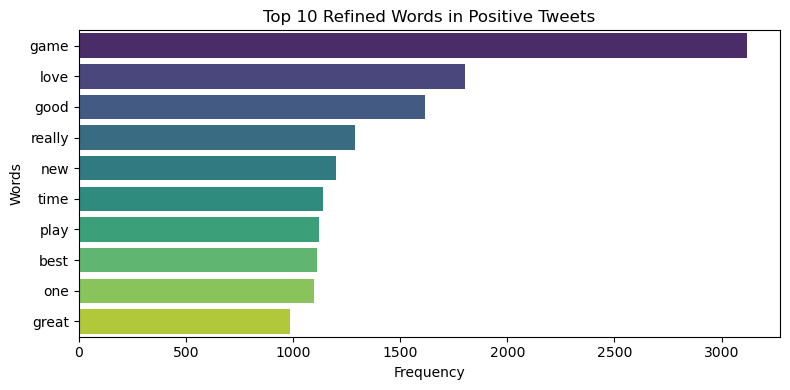

C:\Users\rodes\AppData\Local\Temp\ipykernel_26480\110915568.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


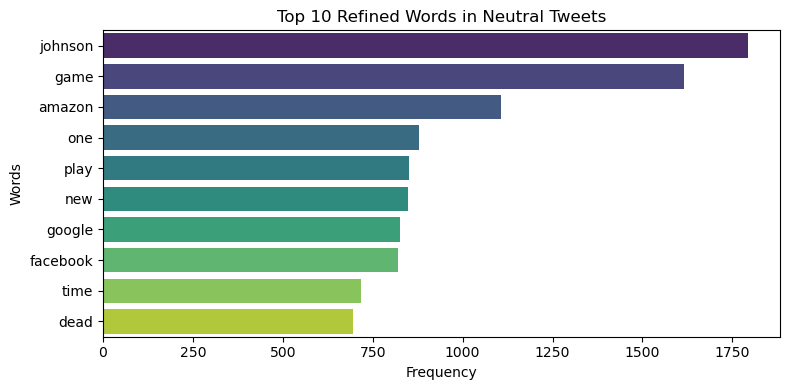

C:\Users\rodes\AppData\Local\Temp\ipykernel_26480\110915568.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


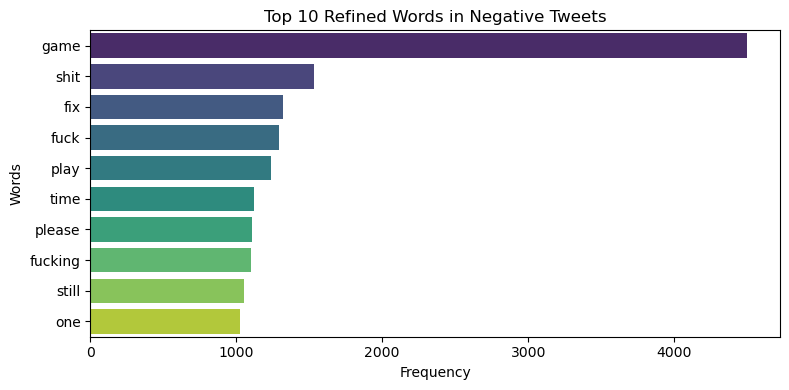

C:\Users\rodes\AppData\Local\Temp\ipykernel_26480\110915568.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


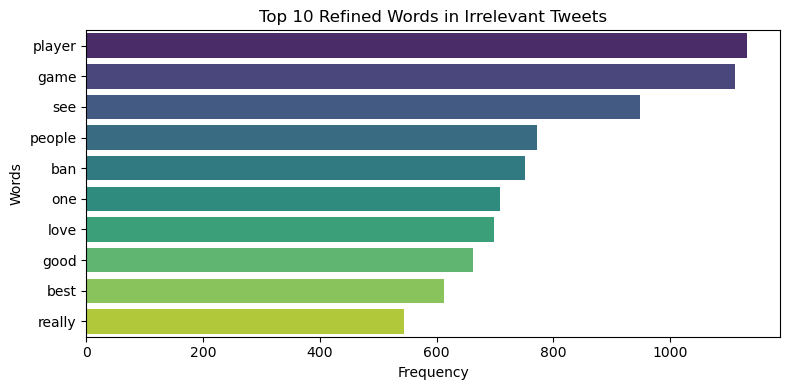

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def get_top_words(sentiment, n=10):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    words = text.split()

    clean_words = []
    for word in words:
        word = word.strip().lower()
        word = re.sub(r'\d+', '', word) 
        if word not in stop_words and len(word) > 2 and word.isalpha():
            lemmatized = lemmatizer.lemmatize(word)
            clean_words.append(lemmatized)

    word_freq = Counter(clean_words)
    return word_freq.most_common(n)

#Visualize top 10 words
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    top_words = get_top_words(sentiment)
    if top_words:
        words, counts = zip(*top_words)
        plt.figure(figsize=(8, 4))
        sns.barplot(x=list(counts), y=list(words), palette='viridis')
        plt.title(f"Top 10 Refined Words in {sentiment} Tweets")
        plt.xlabel("Frequency")
        plt.ylabel("Words")
        plt.tight_layout()
        plt.show()

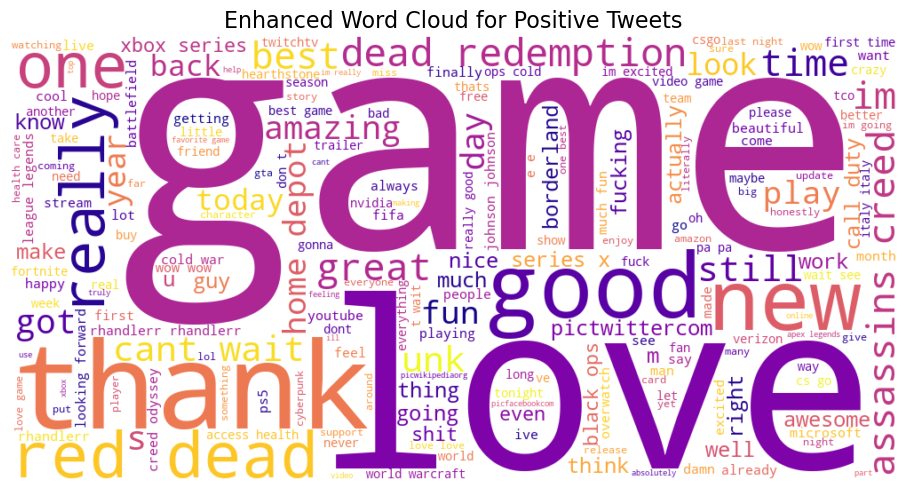

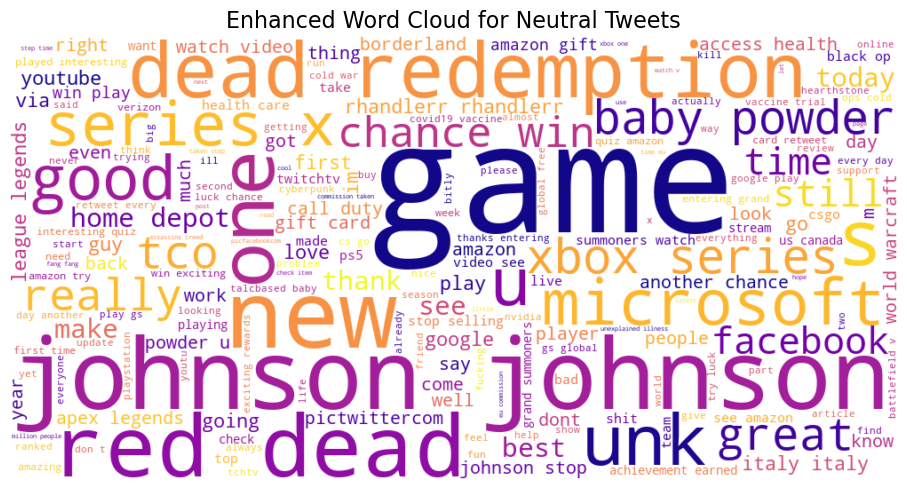

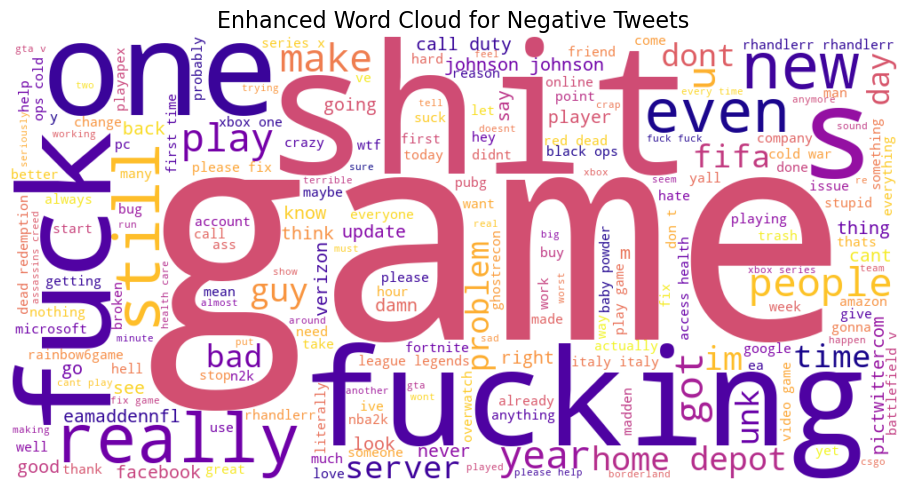

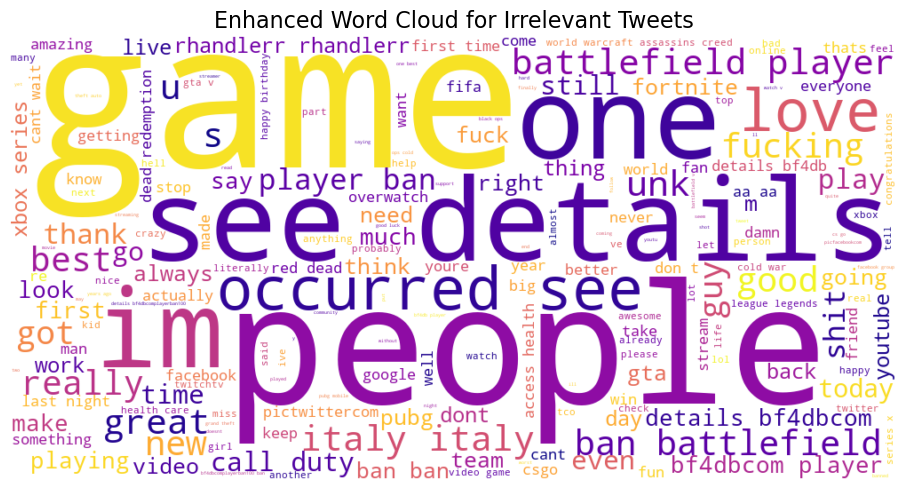

In [25]:
for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    words = [word for word in text.split() if word not in stop_words]
    cleaned_text = ' '.join(words)

    wordcloud = WordCloud(width=1000, height=500,
                          background_color='white',
                          colormap='plasma',
                          max_words=200).generate(cleaned_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Enhanced Word Cloud for {sentiment} Tweets", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

C:\Users\rodes\AppData\Local\Temp\ipykernel_26480\1109636484.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_scores.values, y=brand_scores.index, palette='RdYlGn')


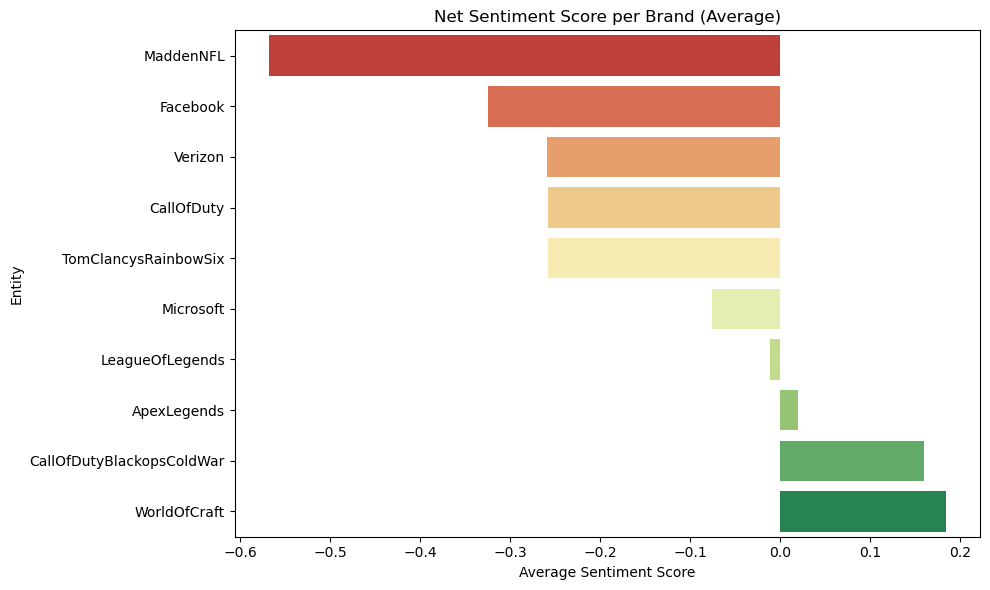

In [28]:
# Define top 10 most entities
top_entities = df['Entity'].value_counts().head(10).index.tolist()

sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_map)
brand_scores = df[df['Entity'].isin(top_entities)].groupby('Entity')['Sentiment_Score'].mean().sort_values()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=brand_scores.values, y=brand_scores.index, palette='RdYlGn')
plt.title("Net Sentiment Score per Brand (Average)")
plt.xlabel("Average Sentiment Score")
plt.tight_layout()
plt.show()


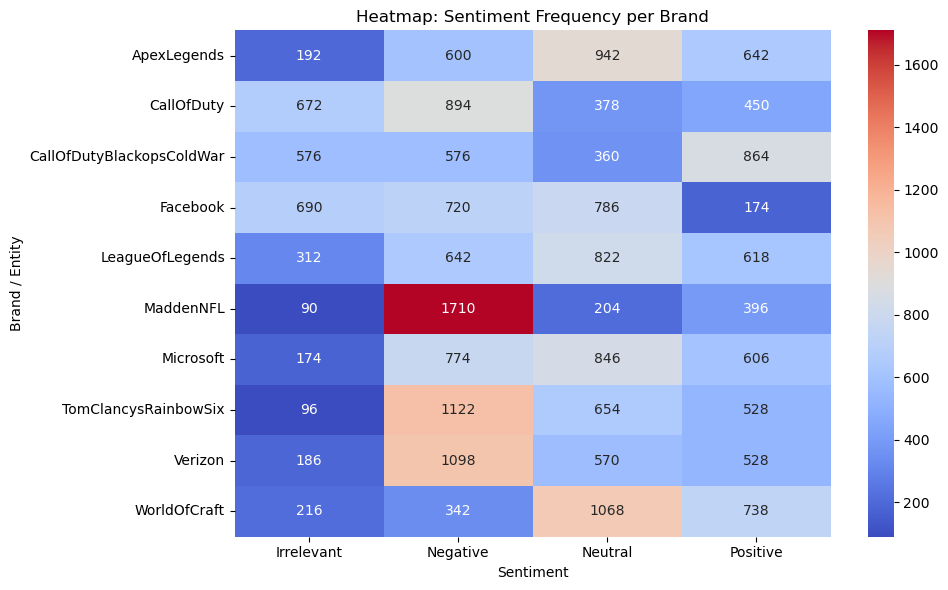

In [29]:
top_entities = df['Entity'].value_counts().head(10).index.tolist()
heatmap_data = df[df['Entity'].isin(top_entities)].pivot_table(
    index='Entity', columns='Sentiment', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
plt.title("Heatmap: Sentiment Frequency per Brand")
plt.ylabel("Brand / Entity")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


In [34]:
print("Final Insights – Twitter Sentiment Analysis\n")

print("Word Usage:")
print("  • Positive: Express excitement or praise (e.g., 'love', 'support') – often product satisfaction.")
print("  • Negative: Show frustration (e.g., 'fail', 'issue') – due to bugs or poor service.")
print("  • Neutral : Informational tone (e.g., 'update', 'launch') – news, PR, or patch notes.\n")

print("Word Clouds:")
print("  • Positive: Strong fan engagement during announcements.")
print("  • Negative: Real-time complaints about glitches or delays.")
print("  • Neutral : Mostly official tweets or news updates.\n")

print("Brand Sentiment Score:")
print("  • Top Positive: Microsoft, ApexLegends – trust, good experience.")
print("  • Most Negative: Facebook – likely user complaints or controversies.\n")

print("Heatmap Highlights:")
print("  • Most Mentioned: TomClancysRainbowSix – high buzz across sentiments.")
print("  • Most Positive : Microsoft – stable, reliable presence.")
print("  • Most Negative : Facebook – repetitive criticism.")
print("  • Most Neutral  : LeagueOfLegends – tournament and patch update tweets.\n")


Final Insights – Twitter Sentiment Analysis

Word Usage:
  • Positive: Express excitement or praise (e.g., 'love', 'support') – often product satisfaction.
  • Negative: Show frustration (e.g., 'fail', 'issue') – due to bugs or poor service.
  • Neutral : Informational tone (e.g., 'update', 'launch') – news, PR, or patch notes.

Word Clouds:
  • Positive: Strong fan engagement during announcements.
  • Negative: Real-time complaints about glitches or delays.
  • Neutral : Mostly official tweets or news updates.

Brand Sentiment Score:
  • Top Positive: Microsoft, ApexLegends – trust, good experience.
  • Most Negative: Facebook – likely user complaints or controversies.

Heatmap Highlights:
  • Most Mentioned: TomClancysRainbowSix – high buzz across sentiments.
  • Most Positive : Microsoft – stable, reliable presence.
  • Most Negative : Facebook – repetitive criticism.
  • Most Neutral  : LeagueOfLegends – tournament and patch update tweets.

